### Instantiate Py Influx DB Client

In [48]:
from jivrtt.influx.client import InfluxQLClient

client = InfluxQLClient('192.168.99.100')

### Form Query Instance

In [49]:
from jivrtt.influx.base import Query

query = Query().measure('price').select(['prc']).where('base', 'CRO').and_('quote', 'USDT')
response = client.fetch('ta', query_inst=query).json()
response['results'][0]['series'][0]

{'name': 'price',
 'columns': ['time', 'prc'],
 'values': [['2020-09-04T18:07:20.631Z', 0.1556],
  ['2020-09-04T18:16:19.683Z', 0.1549],
  ['2020-09-04T18:17:32.175Z', 0.1553],
  ['2020-09-04T18:18:45.431Z', 0.1552],
  ['2020-09-04T18:19:57.976Z', 0.1551],
  ['2020-09-04T18:21:09.441Z', 0.1549],
  ['2020-09-04T18:22:22.449Z', 0.1553],
  ['2020-09-04T18:23:34.415Z', 0.155],
  ['2020-09-04T18:24:47.181Z', 0.1547],
  ['2020-09-04T18:26:01.443Z', 0.1546],
  ['2020-09-04T18:27:14.413Z', 0.1547],
  ['2020-09-04T18:28:27.083Z', 0.1549],
  ['2020-09-04T18:29:37.127Z', 0.155],
  ['2020-09-04T18:30:51.425Z', 0.155],
  ['2020-09-04T18:32:02.96Z', 0.1551],
  ['2020-09-04T18:33:16.016Z', 0.155],
  ['2020-09-04T18:34:27.018Z', 0.1551],
  ['2020-09-04T18:35:41.41Z', 0.1553],
  ['2020-09-04T18:36:54.242Z', 0.1554],
  ['2020-09-04T18:38:06.231Z', 0.1555],
  ['2020-09-04T18:39:14.149Z', 0.1553],
  ['2020-09-04T18:40:27.229Z', 0.1554],
  ['2020-09-04T18:41:42.225Z', 0.1554],
  ['2020-09-04T18:42:54.354Z'

### Create DF

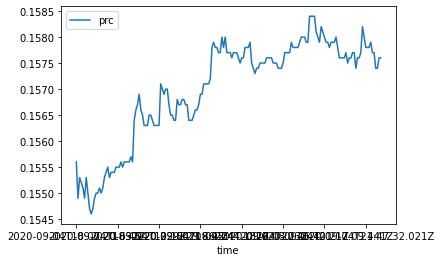

In [50]:
import pandas_ta as ta
import pandas as pd

prc_df = pd.DataFrame(data=response['results'][0]['series'][0]['values'], columns=response['results'][0]['series'][0]['columns'])
prc_df.plot(x='time', y=['prc'])

### Bollinger Bands

In [51]:
bbands_df = prc_df.rename(columns={'prc': 'close'})
bbands_df.ta.bbands(append=True)
bbands_df.plot(x='time', y=['BBL_5_2.0', 'BBM_5_2.0', 'BBU_5_2.0', 'close'], x_compat=True)

### Plotly

In [52]:
import plotly.express as px
fig = px.line(bbands_df, x="time", y=['BBL_5_2.0', 'BBM_5_2.0', 'BBU_5_2.0', 'close'])
fig.show()